<a href="https://colab.research.google.com/github/manojec054/Assignment/blob/master/Assignment_2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This the next assignment. Provided is the backprop code in python. You need to write the rest of program to classify iris dataset. Write the structure of neural net, training, loss generation, plot the loss and experiment with different parameters and network configuration.  Try to write a legible code with lots of comments wherever necessary. Submit the working code to amritansh.48@gmail.com. Just share the Google colab link, makes it easier to debug. 

Have fun writing and debugging the code.!!

In [1]:
class Network(object):
    # ADDED: taking weight, bias num_layers
    def __init__(self, weight, bias, num_layers):
        self.weights = weight
        self.biases = bias
        self.num_layers = num_layers
    
    def update_weight_bias(self, weight, bias):
        self.weights = weight
        self.biases = bias

    def backprop(self, x, y):
        """Return a tuple "(nabla_b, nabla_w)" representing the
        gradient for the cost function C_x.  "nabla_b" and
        "nabla_w" are layer-by-layer lists of numpy arrays, similar
        to "self.biases" and "self.weights"."""
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]

        # feedforward
        activation = x
        activations = [x] # list to store all the activations, layer by layer
        zs = [] # list to store all the z vectors, layer by layer
        for b, w in zip(self.biases, self.weights):
            z = np.dot(w, activation)+b
            zs.append(z)
            activation = self.sigmoid(z)
            activations.append(activation)        
                    
        # backward pass
        delta = self.cost_derivative(activations[-1], y) * self.sigmoid_prime(zs[-1])
        nabla_b[-1] = delta
        nabla_w[-1] = np.dot(delta, activations[-2].transpose())


        for l in range(2, self.num_layers):
            z = zs[-l]
            sp = self.sigmoid_prime(z)
            delta = np.dot(self.weights[-l+1].transpose(), delta) * sp
            nabla_b[-l] = delta
            nabla_w[-l] = np.dot(delta, activations[-l-1].transpose())
        return (nabla_b, nabla_w, self.calculate_loss(activations[-1], y))
    
    # ADDED takes x as input and provide predicted output
    def predict(self, x):
        activation = x
        activations = [x] # list to store all the activations, layer by layer
        zs = [] # list to store all the z vectors, layer by layer
        for b, w in zip(self.biases, self.weights):
            z = np.dot(w, activation)+b
            zs.append(z)
            activation = self.sigmoid(z)
            activations.append(activation) 
        
        return np.argmax(activation)


    def cost_derivative(self, output_activations, y):
        """Return the vector of partial derivatives \partial C_x /
        \partial a for the output activations."""
        return (output_activations-y) 
      
    def sigmoid(self, z):
        """The sigmoid function."""
        return 1.0/(1.0+np.exp(-z))

    def sigmoid_prime(self, z):
        """Derivative of the sigmoid function."""
        return self.sigmoid(z)*(1-self.sigmoid(z))
    
    def calculate_loss(self, prob, y):
        from sklearn.metrics import log_loss
        return log_loss(y, prob)

In [2]:
## Your code from here
import pandas as pd 
import numpy as np 
import seaborn as sns
from sklearn.datasets import load_iris # only to load iris dataset
from sklearn.metrics import confusion_matrix, accuracy_score # for model evaluation
iris_data = load_iris()

In [3]:
# ADDED: Created layer class to add layers 
class Layer():
    def __init__(self):
        self.weight = []
        self.bias = []
        self.hidden_layer = 1 # Included input layer
    
    def add_layer(self, total_neurons, neuron_in_prev_layer):
        #np.random.seed(100)
        self.weight.append(np.random.random((total_neurons, neuron_in_prev_layer)))
        self.bias.append(np.random.random((total_neurons, 1)))
        self.hidden_layer += 1
    
    def get_layer_weight_bias(self, layer_num):
        if layer_num > len(self.weight):
            print(f"ERROR: Only have {len(self.weight)} layers")
        else:
            return (self.weight[layer_num - 1], self.bias[layer_num - 1])


dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [4]:
df = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)
df['target'] = iris_data.target

output_layer_neuron = df.target.value_counts().shape[0]
input_layer_neuron = iris_data.data.shape[1]

In [5]:
# dummies is created to get proper shaped values in output neuron,
# EX: y = 1 = [0,1,0]
#     y = 0 = [1,0,0]
df = pd.get_dummies(df, columns=['target'], prefix='target')
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_0,target_1,target_2
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


In [6]:
layer = Layer()
layer.add_layer(8, input_layer_neuron)       # Hidden layer 1
layer.add_layer(10, 8)                       # Hidden layer 2
layer.add_layer(output_layer_neuron, 10)     # output layer

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.loc[:,:'petal width (cm)'], df.iloc[:,4:], random_state=100, test_size=0.3)

In [8]:
nw = Network(layer.weight, layer.bias, layer.hidden_layer)
loss_list = []
epoch = 500
learning_rate = 0.5
for i in range(0, epoch):
    for row, x in enumerate(range(0, X_train.shape[0])):
        x = X_train.iloc[row].values.reshape(4, 1)
        y = y_train.iloc[row].values.reshape(3,1)
        grad_bias, grad_weight, loss = nw.backprop(x, y)
        layer.weight = layer.weight - (learning_rate * np.array(grad_weight))
        layer.bias = layer.bias - (learning_rate * np.array(grad_bias))
        nw.update_weight_bias(layer.weight, layer.bias)
    
    loss_list.append(loss)

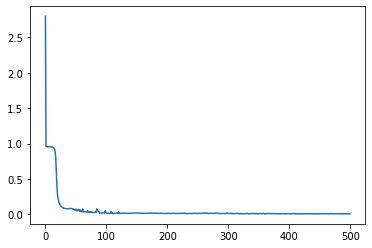

In [9]:
import matplotlib.pyplot as plt   
plt.plot(loss_list)

In [10]:
pred = []
for i, row in enumerate(range(0, X_test.shape[0])):
    x = X_test.iloc[row].values.reshape(4, 1)
    pred.append(nw.predict(x))

In [11]:
confusion_matrix(np.array(pred), np.argmax(y_test.values, axis=1))

array([[16,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 18]], dtype=int64)

In [12]:

accuracy_score(np.array(pred), np.argmax(y_test.values, axis=1))

1.0